In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
general_data = pd.read_csv(filename)
general_data.head()

Saving 2017_jun_final - 2017_jun_final.csv to 2017_jun_final - 2017_jun_final.csv


,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [3]:
general_data.shape # (8704,25) я так розумію 1й рядок буде завжди тайтлом, тому він вираховується з загальної кількості

(8704, 25)

In [4]:
general_data.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

**Порахуйте, яка частка пропусків міститься в кожній колонці **

In [5]:
missing_percentage = general_data.isnull().sum() / len(general_data)
missing_percentage *= 100
print(missing_percentage)

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [6]:
columns_with_missing = missing_percentage[missing_percentage > 0].index.tolist()
columns_to_keep = ['Мова програмування']
columns_to_drop = [col for col in columns_with_missing if col not in columns_to_keep]
data_cleaned = general_data.drop(columns=columns_to_drop)

In [7]:
missing_percentage_cleaned = data_cleaned.isnull().sum() / len(data_cleaned) * 100
print(missing_percentage_cleaned)

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64


In [8]:
data_dropped = data_cleaned.dropna()

In [9]:
new_data_shape = data_dropped.shape
print(f"New data shape: {new_data_shape}")

New data shape: (4854, 20)


In [10]:
python_data = data_dropped[data_dropped['Мова програмування'].str.contains('Python', na=False)]

In [11]:
python_data_shape = python_data.shape
print(f"Shape of the dataframe with Python developers: {python_data_shape}")

Shape of the dataframe with Python developers: (207, 20)


In [12]:
grouped_data = python_data.groupby('Посада')['Зарплата на місяць'].agg(['min', 'max']).reset_index()


In [13]:
def fill_avg_salary(row):
    return (row['min'] + row['max']) / 2

In [14]:
grouped_data['avg'] = grouped_data.apply(fill_avg_salary, axis=1)

In [15]:
describe_avg = grouped_data['avg'].describe()
print(describe_avg)

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


In [16]:
# Save the cleaned and processed data to a new CSV file
output_file_path = 'processed_2017_jun_final.csv'
grouped_data.to_csv(output_file_path, index=False)

# Download the file
from google.colab import files
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

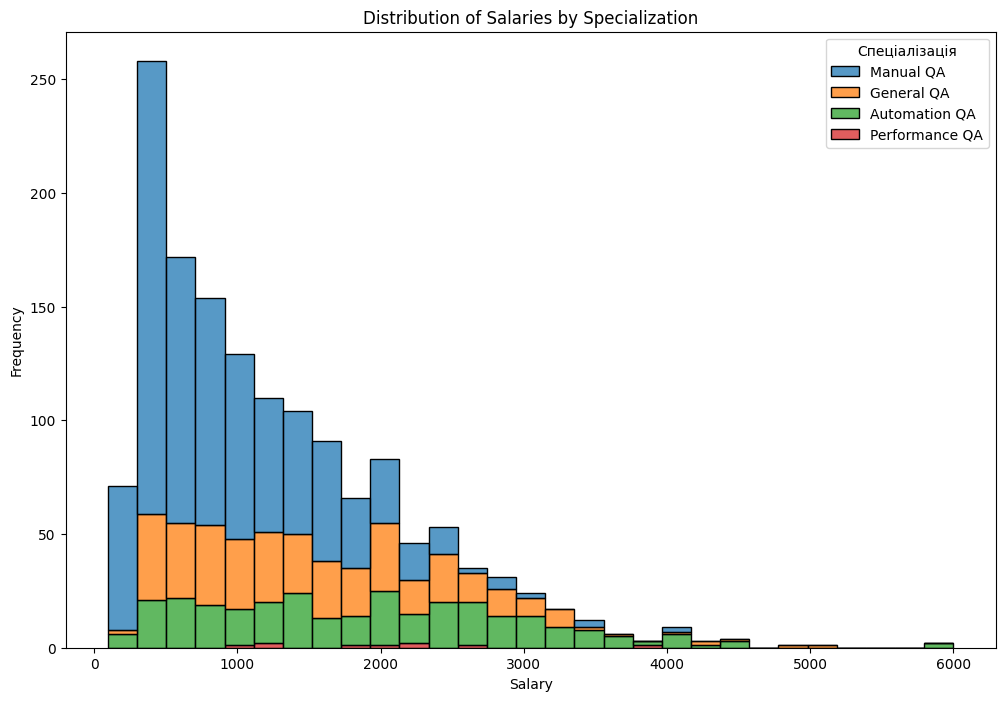

In [20]:
plt.figure(figsize=(12, 8))
sns.histplot(data=general_data, x='salary', hue='Спеціалізація', multiple='stack')
plt.title('Distribution of Salaries by Specialization')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


<ipython-input-21-7218dbd032d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_salary_agg, x='salary', y='Місто', palette='coolwarm')


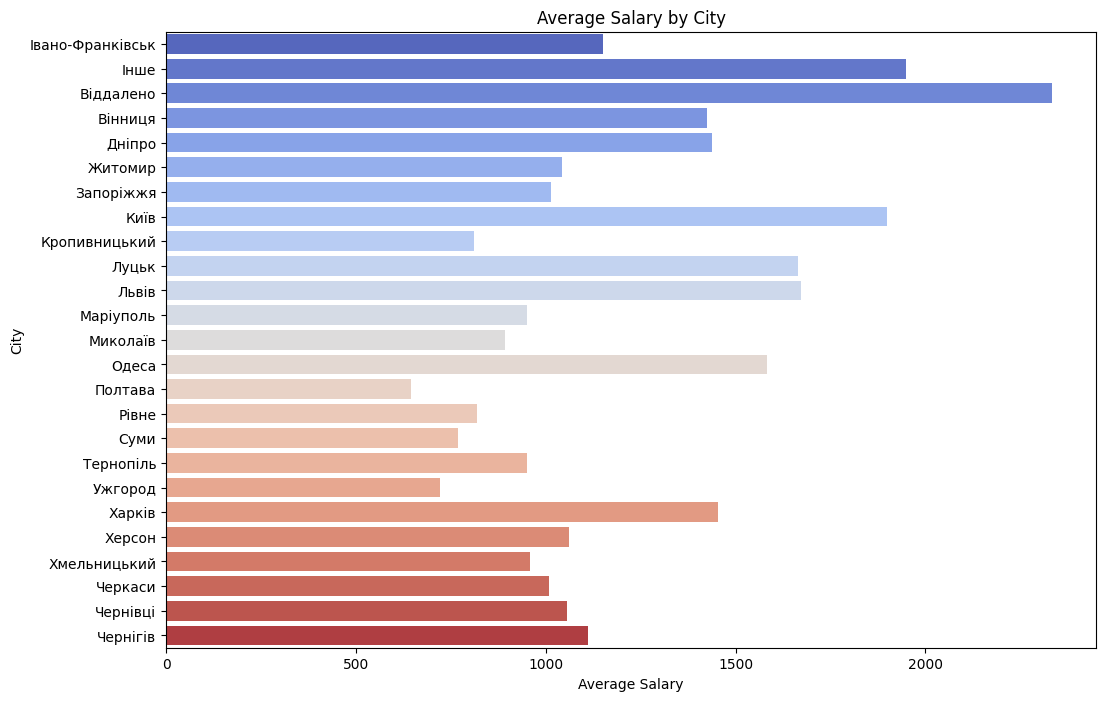

In [21]:
city_salary_agg = general_data.groupby('Місто')['salary'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=city_salary_agg, x='salary', y='Місто', palette='coolwarm')
plt.title('Average Salary by City')
plt.xlabel('Average Salary')
plt.ylabel('City')
plt.show()


<ipython-input-22-f5f7c5eca8cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=english_salary_agg, x='salary', y='Рівень англійської', palette='viridis')


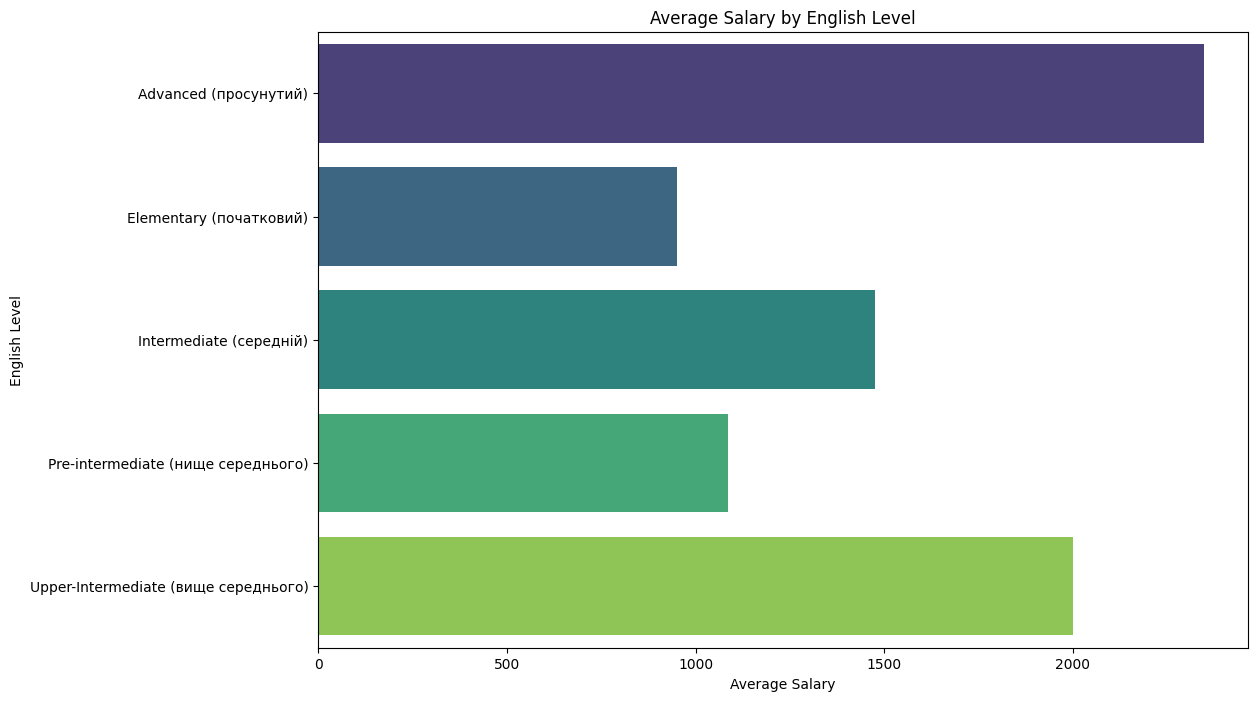

In [22]:
english_salary_agg = general_data.groupby('Рівень англійської')['salary'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=english_salary_agg, x='salary', y='Рівень англійської', palette='viridis')
plt.title('Average Salary by English Level')
plt.xlabel('Average Salary')
plt.ylabel('English Level')
plt.show()
